In [2]:
import json
import pennylane as qml
import pennylane.numpy as np

In [41]:

def W(alpha, beta):
    """ This function returns the matrix W in terms of
    the coefficients alpha and beta

    Args:
        - alpha (float): The prefactor alpha of U in the linear combination, as in the
        challenge statement.
        - beta (float): The prefactor beta of V in the linear combination, as in the
        challenge statement.
    Returns 
        -(numpy.ndarray): A 2x2 matrix representing the operator W,
        as defined in the challenge statement
    """

    return np.array([[np.sqrt(alpha), -np.sqrt(beta)],[np.sqrt(beta), np.sqrt(alpha)]])/(np.sqrt(alpha+beta))
    # Put your code here #
    # Return the real matrix of the unitary W, in terms of the coefficients.


dev = qml.device('default.qubit', wires = 2)

@qml.qnode(dev)
def linear_combination(U, V,  alpha, beta):
    """This circuit implements the circuit that probabilistically calculates the linear combination 
    of the unitaries.

    Args:
        - U (list(list(float))): A 2x2 matrix representing the single-qubit unitary operator U.
        - V (list(list(float))): A 2x2 matrix representing the single-qubit unitary operator U.
        - alpha (float): The prefactor alpha of U in the linear combination, as above.
        - beta (float): The prefactor beta of V in the linear combination, as above.

    Returns:
        -(numpy.tensor): Probabilities of measuring the computational
        basis states on the auxiliary wire. 
    """

    qml.QubitUnitary(W(alpha, beta), wires=0)
    #qml.PauliX(0)
    qml.ctrl(qml.QubitUnitary(U, wires=1), control=0, control_values=0)
    #qml.PauliX(0)
    # Put your code here #
    qml.ctrl(qml.QubitUnitary(V, wires=1), control=0)
    qml.adjoint(qml.QubitUnitary(W(alpha, beta), wires=0))
    # Return the probabilities on the first wire
    return qml.probs([0])

# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:
    dev = qml.device('default.qubit', wires = 2)
    ins = json.loads(test_case_input)
    output = linear_combination(*ins)[0].numpy()

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-4
    ), "Your circuit doesn't look quite right "


test_cases = [['[[[ 0.70710678,  0.70710678], [ 0.70710678, -0.70710678]],[[1, 0], [0, -1]], 1, 3]', '0.8901650422902458']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[[[ 0.70710678,  0.70710678], [ 0.70710678, -0.70710678]],[[1, 0], [0, -1]], 1, 3]'...
Correct!


------
# <center> Tests

In [36]:
def draw_circuit_nice(function, test_cases):
    import matplotlib.pyplot as plt
    #test_cases = [['[[0, 1], 0, 3]', '[-1.0,  1.0,  1.0,  1.0, -1.0, -1.0,  1.0,  1.0,  1.0]']]
    #state, error_key, qubit = json.loads(test_cases[0][0])
    qml.drawer.use_style("black_white")
    fig, ax = qml.draw_mpl(function)(*json.loads(test_cases[0][0]))
    plt.show()

test_cases = [['[[[ 0.70710678,  0.70710678], [ 0.70710678, -0.70710678]],[[1, 0], [0, -1]], 1, 3]', '0.8901650422902458']]


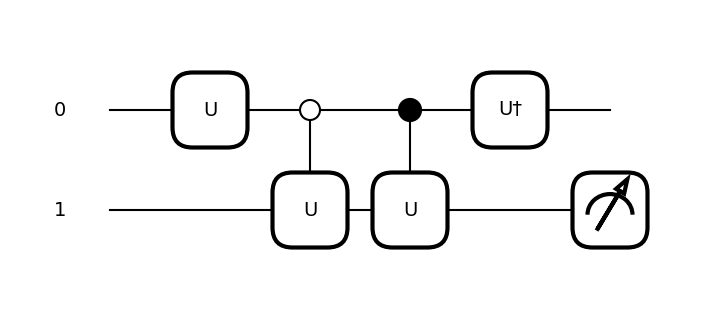

In [34]:
draw_circuit_nice(linear_combination, test_cases)

In [25]:
json.loads(test_cases[0][0])

[[[0.70710678, 0.70710678], [0.70710678, -0.70710678]],
 [[1, 0], [0, -1]],
 1,
 3]

In [39]:
W(1,0)

tensor([[ 1., -0.],
        [ 0.,  1.]], requires_grad=True)

In [40]:
linear_combination(*json.loads(test_cases[0][0]))

tensor([0.875, 0.125], requires_grad=True)